# Appendix A: Import and Analysis of Data

In [1]:
#import necessary packages
import pandas #for data analysis
pandas.set_option('max_rows', 10)
import numpy
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import statsmodels.api as statsmodels #for linear regression
import seaborn as sns #for plotting
sns.set(color_codes=True) 

#import data
filename = 'timesData.csv'
data = pandas.read_csv(filename)

#delete unnecessary columns
data = data.drop("world_rank", axis=1)
data = data.drop("university_name", axis=1)
data = data.drop("country", axis=1)
data = data.drop("international", axis=1)
data = data.drop("citations", axis=1)
data = data.drop("income", axis=1)
data = data.drop("total_score", axis=1)
data = data.drop("num_students", axis=1)
data = data.drop("student_staff_ratio", axis=1)
data = data.drop("international_students", axis=1)
data = data.drop("female_male_ratio", axis=1)
data = data.drop("year", axis=1)

#show first five rows of the data
data.head(5)

,teaching,research
0,99.7,98.7
1,97.7,98.0
2,97.8,91.4
3,98.3,98.1
4,90.9,95.4


In [2]:
#using library function to count the numbers of entries
print("Count")
data.count()

Count


teaching    2603
research    2603
dtype: int64

In [3]:
#using library function to calculate the means
print("Mean")
data.mean()

Mean


teaching    37.801498
research    35.910257
dtype: float64

In [4]:
#using library function to calculate the medians
print("Median")
data.median()

Median


teaching    33.9
research    30.5
dtype: float64

In [5]:
#using library function to calculate the modes
#there are two results for teaching because this variable has two modes
print("Mode")
data.mode()

Mode


,teaching,research
0,18.4,30.0
1,22.6,NaN


In [6]:
#using library function to calculate the standard deviations
print("Standard Deviation")
data.std()

Standard Deviation


teaching    17.604218
research    21.254805
dtype: float64

In [7]:
#using library function to calculate the maximum values
print("Maximum")
data.max()

Maximum


teaching    99.7
research    99.4
dtype: float64

In [8]:
#using library function to calculate the minimum values
print("Minimum")
data.min()

Minimum


teaching    9.9
research    2.9
dtype: float64

# Appendix B: Visualize Data

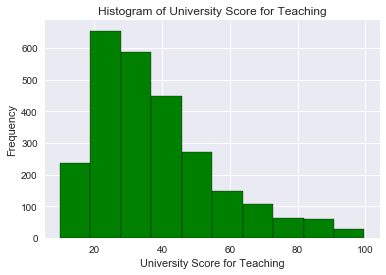

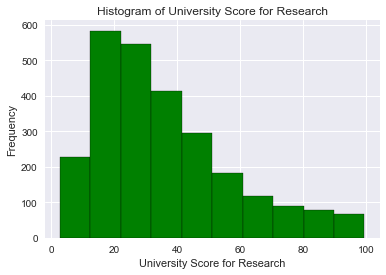

In [9]:
#turning the dataframe into lists for easier analysis
teaching_list = list(data.teaching)
research_list = list(data.research)

#creating histogram for the teaching score
plt.hist(teaching_list, 10, facecolor='green', ec='black')

#formatting the figure
plt.xlabel("University Score for Teaching")
plt.ylabel("Frequency")
plt.title("Histogram of University Score for Teaching")
plt.show()

#creating histogram for the research score
plt.hist(research_list, 10, facecolor='green', ec='black')

#formatting the figure
plt.xlabel("University Score for Research")
plt.ylabel("Frequency")
plt.title("Histogram of University Score for Research")
plt.show()

# Appendix C: Scatterplot and Regression

R-squared =  0.834
Regression equation: research =  1.102 * teaching +  -5.765


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


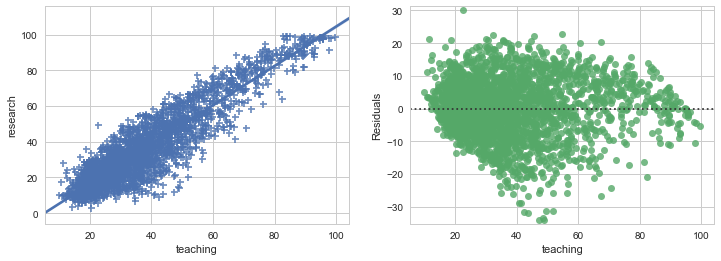

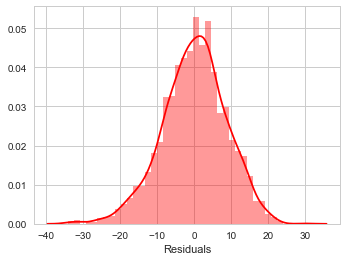

In [10]:
#code from class with own comments

def regression_model(column_x, column_y):
    #the function creates a scatterplot, residual plot, finds R-squared, 
    #and the regression equation by using library functions

    #the regression line is fitted with the"statsmodels" library:
    X = statsmodels.add_constant(data[column_x])
    Y = data[column_y]
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS = "ordinary least squares"

    #the regression parameters are found from model, rounded to 3 decimal places
    Rsquared = round(regressionmodel.rsquared,3)
    slope = round(regressionmodel.params[1],3)
    intercept = round(regressionmodel.params[0],3)

    #plotting
    sns.set_style("whitegrid")
    fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12,4))
    sns.regplot(x=column_x, y=column_y, data=data, marker="+", ax=ax1) #scatter plot
    sns.residplot(x=column_x, y=column_y, data=data, ax=ax2) #residual plot
    ax2.set(ylabel='Residuals')
    ax2.set_ylim(min(regressionmodel.resid)-1,max(regressionmodel.resid)+1)
    plt.figure(figsize=(5.5,4)) #histogram
    sns.distplot(regressionmodel.resid, kde=True, axlabel='Residuals', color='red') #histogram

    #printing the results
    print("R-squared = ",Rsquared)
    print("Regression equation: "+column_y+" = ",slope,"* "+column_x+" + ",intercept)

#calling the function with the variables 
regression_model('teaching','research')

# Appendix D: Pearson's r

In [11]:
#importing linear regression from scipy stats and using it to find Pearson's r
from scipy.stats import linregress
linregress(teaching_list, research_list)

LinregressResult(slope=1.1024734501276143, intercept=-5.764890823757938, rvalue=0.913119785697913, pvalue=0.0, stderr=0.00965165375443096)

# Appendix E: Regression Equation and p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               research   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                 1.305e+04
Date:                Fri, 01 Feb 2019   Prob (F-statistic):               0.00
Time:                        09:45:35   Log-Likelihood:                -9313.8
No. Observations:                2603   AIC:                         1.863e+04
Df Residuals:                    2601   BIC:                         1.864e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7649      0.402    -14.324      0.000      -6.554      -4.976
teaching       1.1025      0.010    114.226      0.000       1.084       1.121
==============================================================================
Omnibus:                       50.947   Durbin-Watson:                   1.815
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.596
Skew:                          -0.305   Prob(JB):                     5.13e-13
Kurtosis:                       3.388   Cond. No.                         98.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

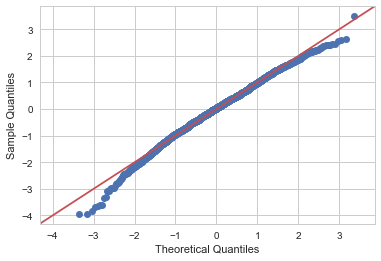

In [12]:
#code from class with own comments

def regression(column_x, column_y):
    #the function computes a linear regression model along with a quantile-quantile plot


    #the regression line is plotted when there is only one predictor variable
    if len(column_x)==1:
        plt.figure()
        sns.regplot(x=column_x[0], y=column_y, data=data, marker="+",fit_reg=True,color='orange')

    #the predictor (X) and response (Y) variables are defined
    X = data[column_x]
    X = statsmodels.add_constant(X)
    Y = data[column_y]

    #constructing the model
    global regressionmodel 
    regressionmodel = statsmodels.OLS(Y,X).fit() #OLS = "ordinary least squares"

    #quantile-quantile plot
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45')

#calling the function with the variables and showing the results
regression('teaching','research')
regressionmodel.summary()

# Appendix F: Confidence Interval for the Slope

In [13]:
#finding confidence interval for the slope

#values from previous calculations
r_squared = 0.834
n = 2603
std_teacher = 17.60
std_research = 21.25
slope = 1.1025

#calculating standard error of the sample mean
se_b = (((((1 - r_squared) / (n - 2)) ** 0.5)) * (std_research / std_teacher))
print("SE(b) =", se_b)

#finding degrees of freedom
df = n - 2
print("Degrees of freedom = ", df)

#two-tailed t-score
tscore = stats.t.ppf(1-0.025, 2601)
print("t-score =", tscore)

#finding the confidence interval
margin = tscore * se_b
print("Margin =", margin)

#printing the results
print("95% confidence interval = (" ,slope - margin, ",", slope + margin,")" )

SE(b) = 0.009645619691033789
Degrees of freedom =  2601
t-score = 1.9608764631126046
Margin = 0.01891386862428363
95% confidence interval = ( 1.0835861313757165 , 1.1214138686242836 )
